# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [194]:
import zipfile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import os
import matplotlib.pylab as plt
%pylab inline

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

def find_bind_face(gray: np.ndarray, scale_factor:float=1.2, display:bool=True) -> None:
    '''This is just a helper function. '''
    faces = face_cascade.detectMultiScale(gray, scaleFactor=scale_factor)
    print(f'Found {len(faces)} faces')
    pil_img=Image.fromarray(gray,mode="L")
    drawing=ImageDraw.Draw(pil_img)
    if len(faces)==0:
        return None
    for rec in faces.tolist():
        drawing.rectangle((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]), outline="white", width=10)
    if display:
        display(pil_img)
    return faces

# the rest is up to you!

Populating the interactive namespace from numpy and matplotlib


/miniconda3/envs/b37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [195]:
def crop_zoom_face(image: np.ndarray, rects: list) -> list:
    list_of_imgs = []
    if len(image.shape)==3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    for rec in rects:
        region_to_crop = (rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3])
        list_of_imgs.append(Image.fromarray(image).crop(region_to_crop))
    return list_of_imgs

In [196]:
def figure_faces(imgs: list) -> None:
    fig=plt.figure(figsize=(20, 10))
    columns = len(imgs)
    rows = 1
    for i in range(0, columns):
        img = imgs[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img, cmap='gray')
    plt.show()

In [203]:
def main(search_string: str, 
         target_dir: str='readonly/small_img.zip') -> None:
    ''' Main function that does the end 2 end as per comments.
    Takes a while so be patient!
    '''
    
    folder = target_dir.split('/')[1][:-4]
    if not os.path.exists(folder):
        # unzip 
        unzip_noop = zipfile.ZipFile(target_dir).extractall()
        img_files = [ f for f in list(os.listdir('.')) if f.endswith('.png') ]
        
        # make folders and place things there
        os.mkdir(folder)
        for file in img_files:
            os.rename(file, f"{folder}/{file}")
    else:
        img_files = [ f for f in list(os.listdir(folder)) if f.endswith('.png') ]
    
    print('Starting loading files...')
    # read as cv2 imgs
    img_list = [ cv.imread(f"{folder}/{f}") for f in img_files ][::-1]

    # get all text
    all_text = [ pytesseract.image_to_string(i) for i in img_list ]

    # get all relevant images
    relevant_images = [ (i,img_list[i]) for i in range(len(img_list)) 
                     if search_string in all_text[i] ]
    
    for idx, current_image in relevant_images:
        print(f'Results found in file {img_files[idx]}')
        # convert to gray if not already 
        gray_image = cv.cvtColor(current_image, cv.COLOR_BGR2GRAY)
        # find binding rectangles
        rects = find_bind_face(gray_image, 1.3, display=False)
        if rects is not None:
            # get all cropped and zoomed in faces
            imgs = crop_zoom_face(gray_image, rects)
            # display
            figure_faces(imgs)
        else:
            print('But there were no faces in that file!')

Starting loading files...
Results found in file a-4.png
Found 2 faces


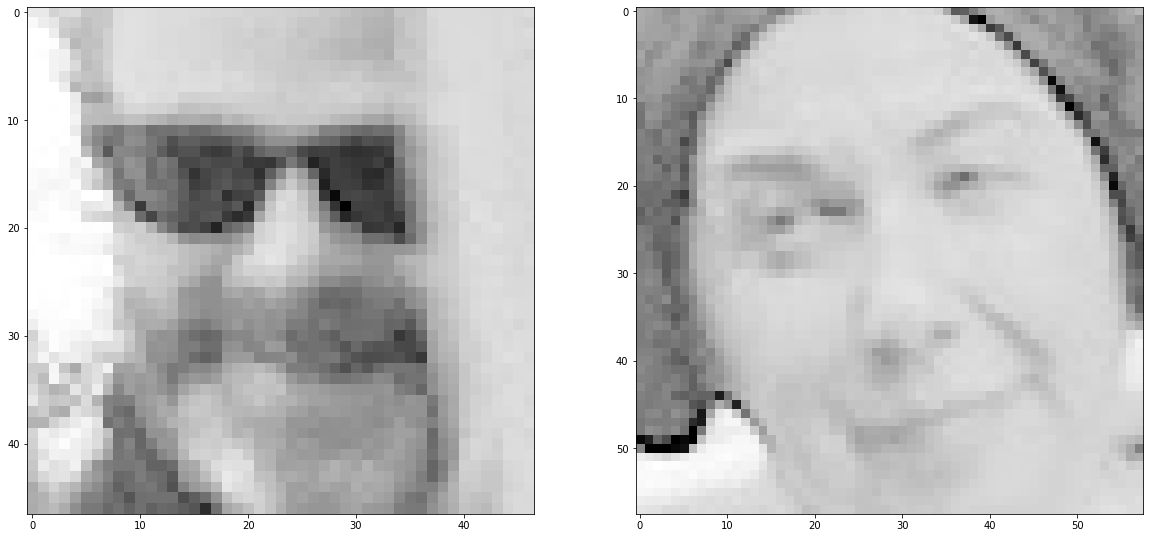

Results found in file a-7.png
Found 1 faces


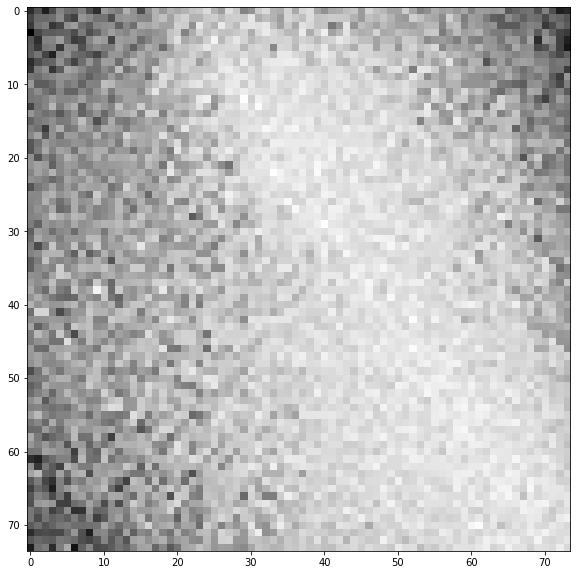

Results found in file a-3.png
Found 0 faces
But there were no faces in that file!
Results found in file a-1.png
Found 9 faces


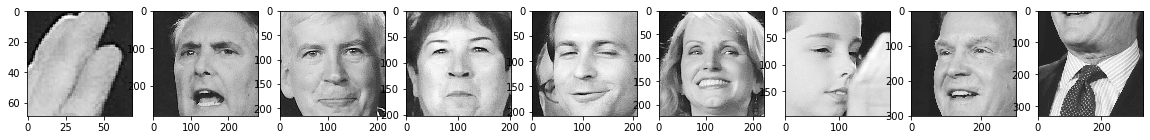

Results found in file a-0.png
Found 7 faces


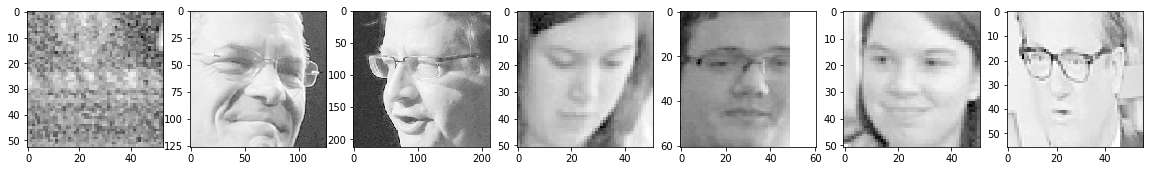

Results found in file a-8.png
Found 2 faces


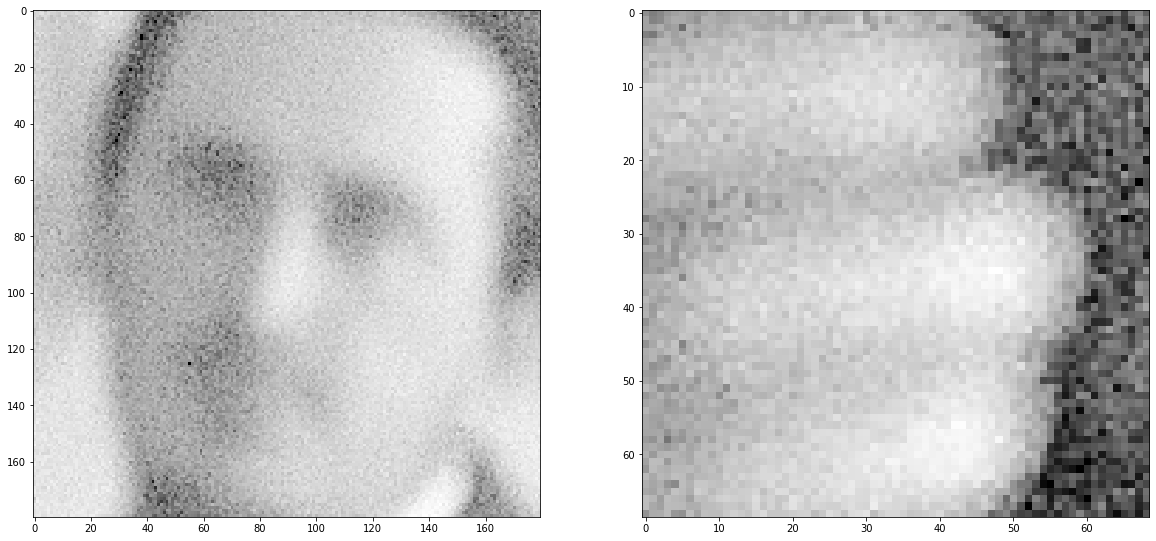

Results found in file a-9.png
Found 3 faces


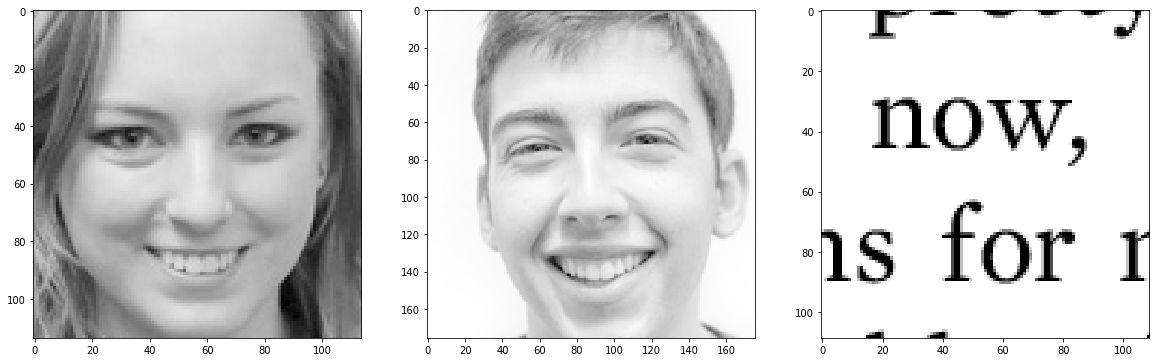

In [204]:
main('Mark', 'readonly/images.zip')

Starting loading files...
Results found in file a-2.png
Found 9 faces


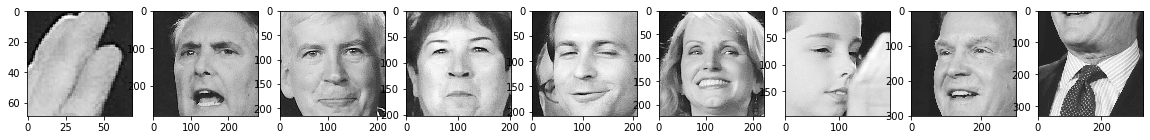

Results found in file a-1.png
Found 2 faces


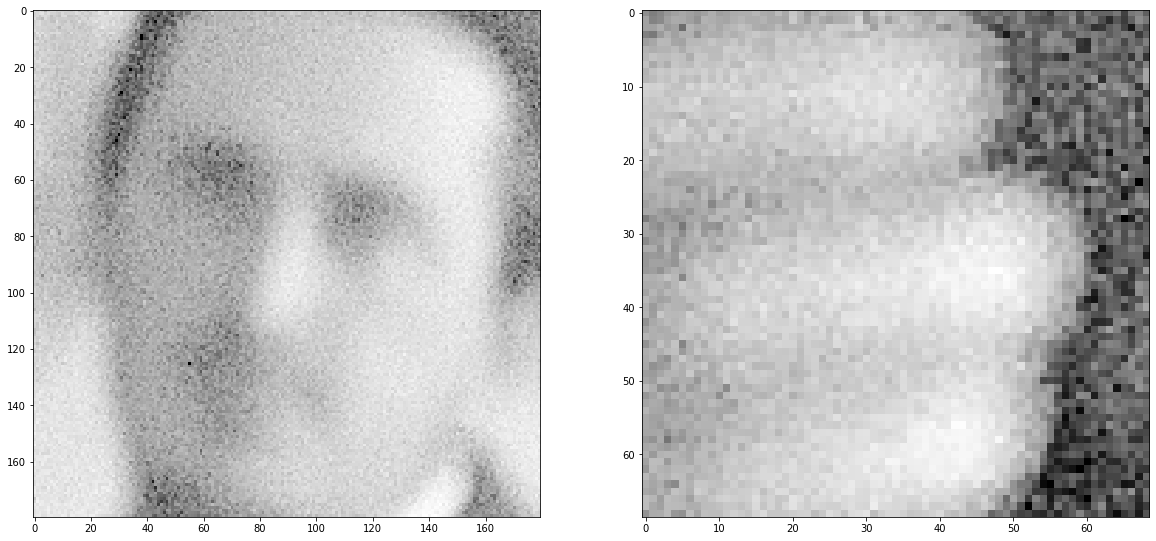

In [205]:
main('Christopher','readonly/small_img.zip')

In [10]:
test_img = cv.imread('readonly/floyd.jpg')
gray = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)

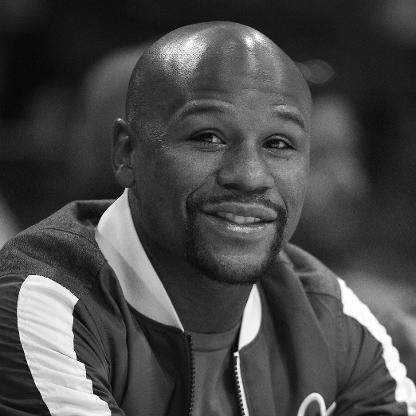

In [11]:
image = Image.fromarray(gray, "L")
display(image)

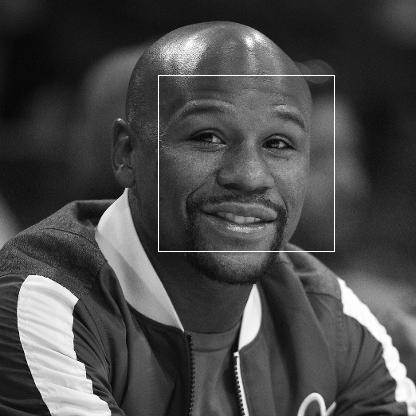

In [12]:
find_bind_face(gray)

In [45]:
unzip_noop = zipfile.ZipFile('readonly/small_img.zip').extractall()
img_files = [ f for f in list(os.listdir('.')) if f.endswith('.png') ]
img_files

['a-2.png', 'a-3.png', 'a-1.png', 'a-0.png']

In [47]:
img_list = [ cv.imread(f) for f in img_files ]
[i.shape for i in img_list] 

[(6300, 3600, 3), (6300, 7200, 3), (6300, 3600, 3), (6300, 3600, 3)]

In [51]:
all_text = [ pytesseract.image_to_string(i) for i in img_list ]

In [52]:
[ t[:400] for t in all_text ]

['The Michigan Daily — michigandaily.com\n\nPage 3A — Wednesday, November 5, 2014\n\n \n\nChe Michigan Daily\n\n  \n\nBic\n\noe\n\n— # eit :\ncae ; i Tih Stee\n; ne a 5\n\nEdited and managed by students at\nthe University of Michigan since 1890.\n\n420 Maynard St.\nAnn Arbor, MI 48109\n\nnin! tothedaily@michigandaily.com\nMEGAN MCDONALD\nPETER SHAHIN and DANIEL WANG KATIE BURKE\n\nEDITOR IN CHIEF\n\nEDITORIAL PAGE EDITORS\n\nMANAG',
 '4A, 5A — Wednesday, November 5, 2014\n\nThe Michigan Daily — michigandaily.com\n\n \n\n \n\nLUNA ANNA ARCHEY/Daily\n\nAnn Arbor Mayor elect Chris Taylor interacts with supporters at a watch party at the Ann Arbor Brewing Company Tuesday.\n\nAfter eight years, Republicans take control of Senate\n\nExperts predict\nworsening gridlock\nin Washington\n\nBy SAM GRINGLAS\nDaily News Editor\n\nAfter eight years in the\nminori',
 '2A — Wednesday, November 5, 2014\n\nStudents vote, watch Midterm Election 2014\n\nThe Michigan Daily — michigandaily.com\n\n \n\nChe M

In [62]:
SEARCH_STRING = 'Christopher'

relevant_images = [ (i,img_list[i]) for i in range(len(img_list)) 
                 if SEARCH_STRING in all_text[i] ]

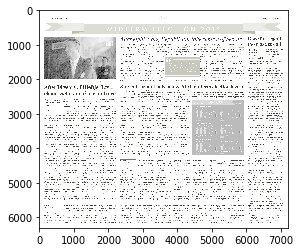

In [64]:
plt.imshow(relevant_images[0][1])

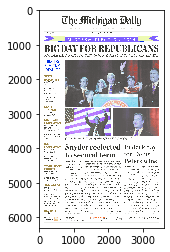

In [66]:
plt.imshow(relevant_images[1][1])

Found 2 faces


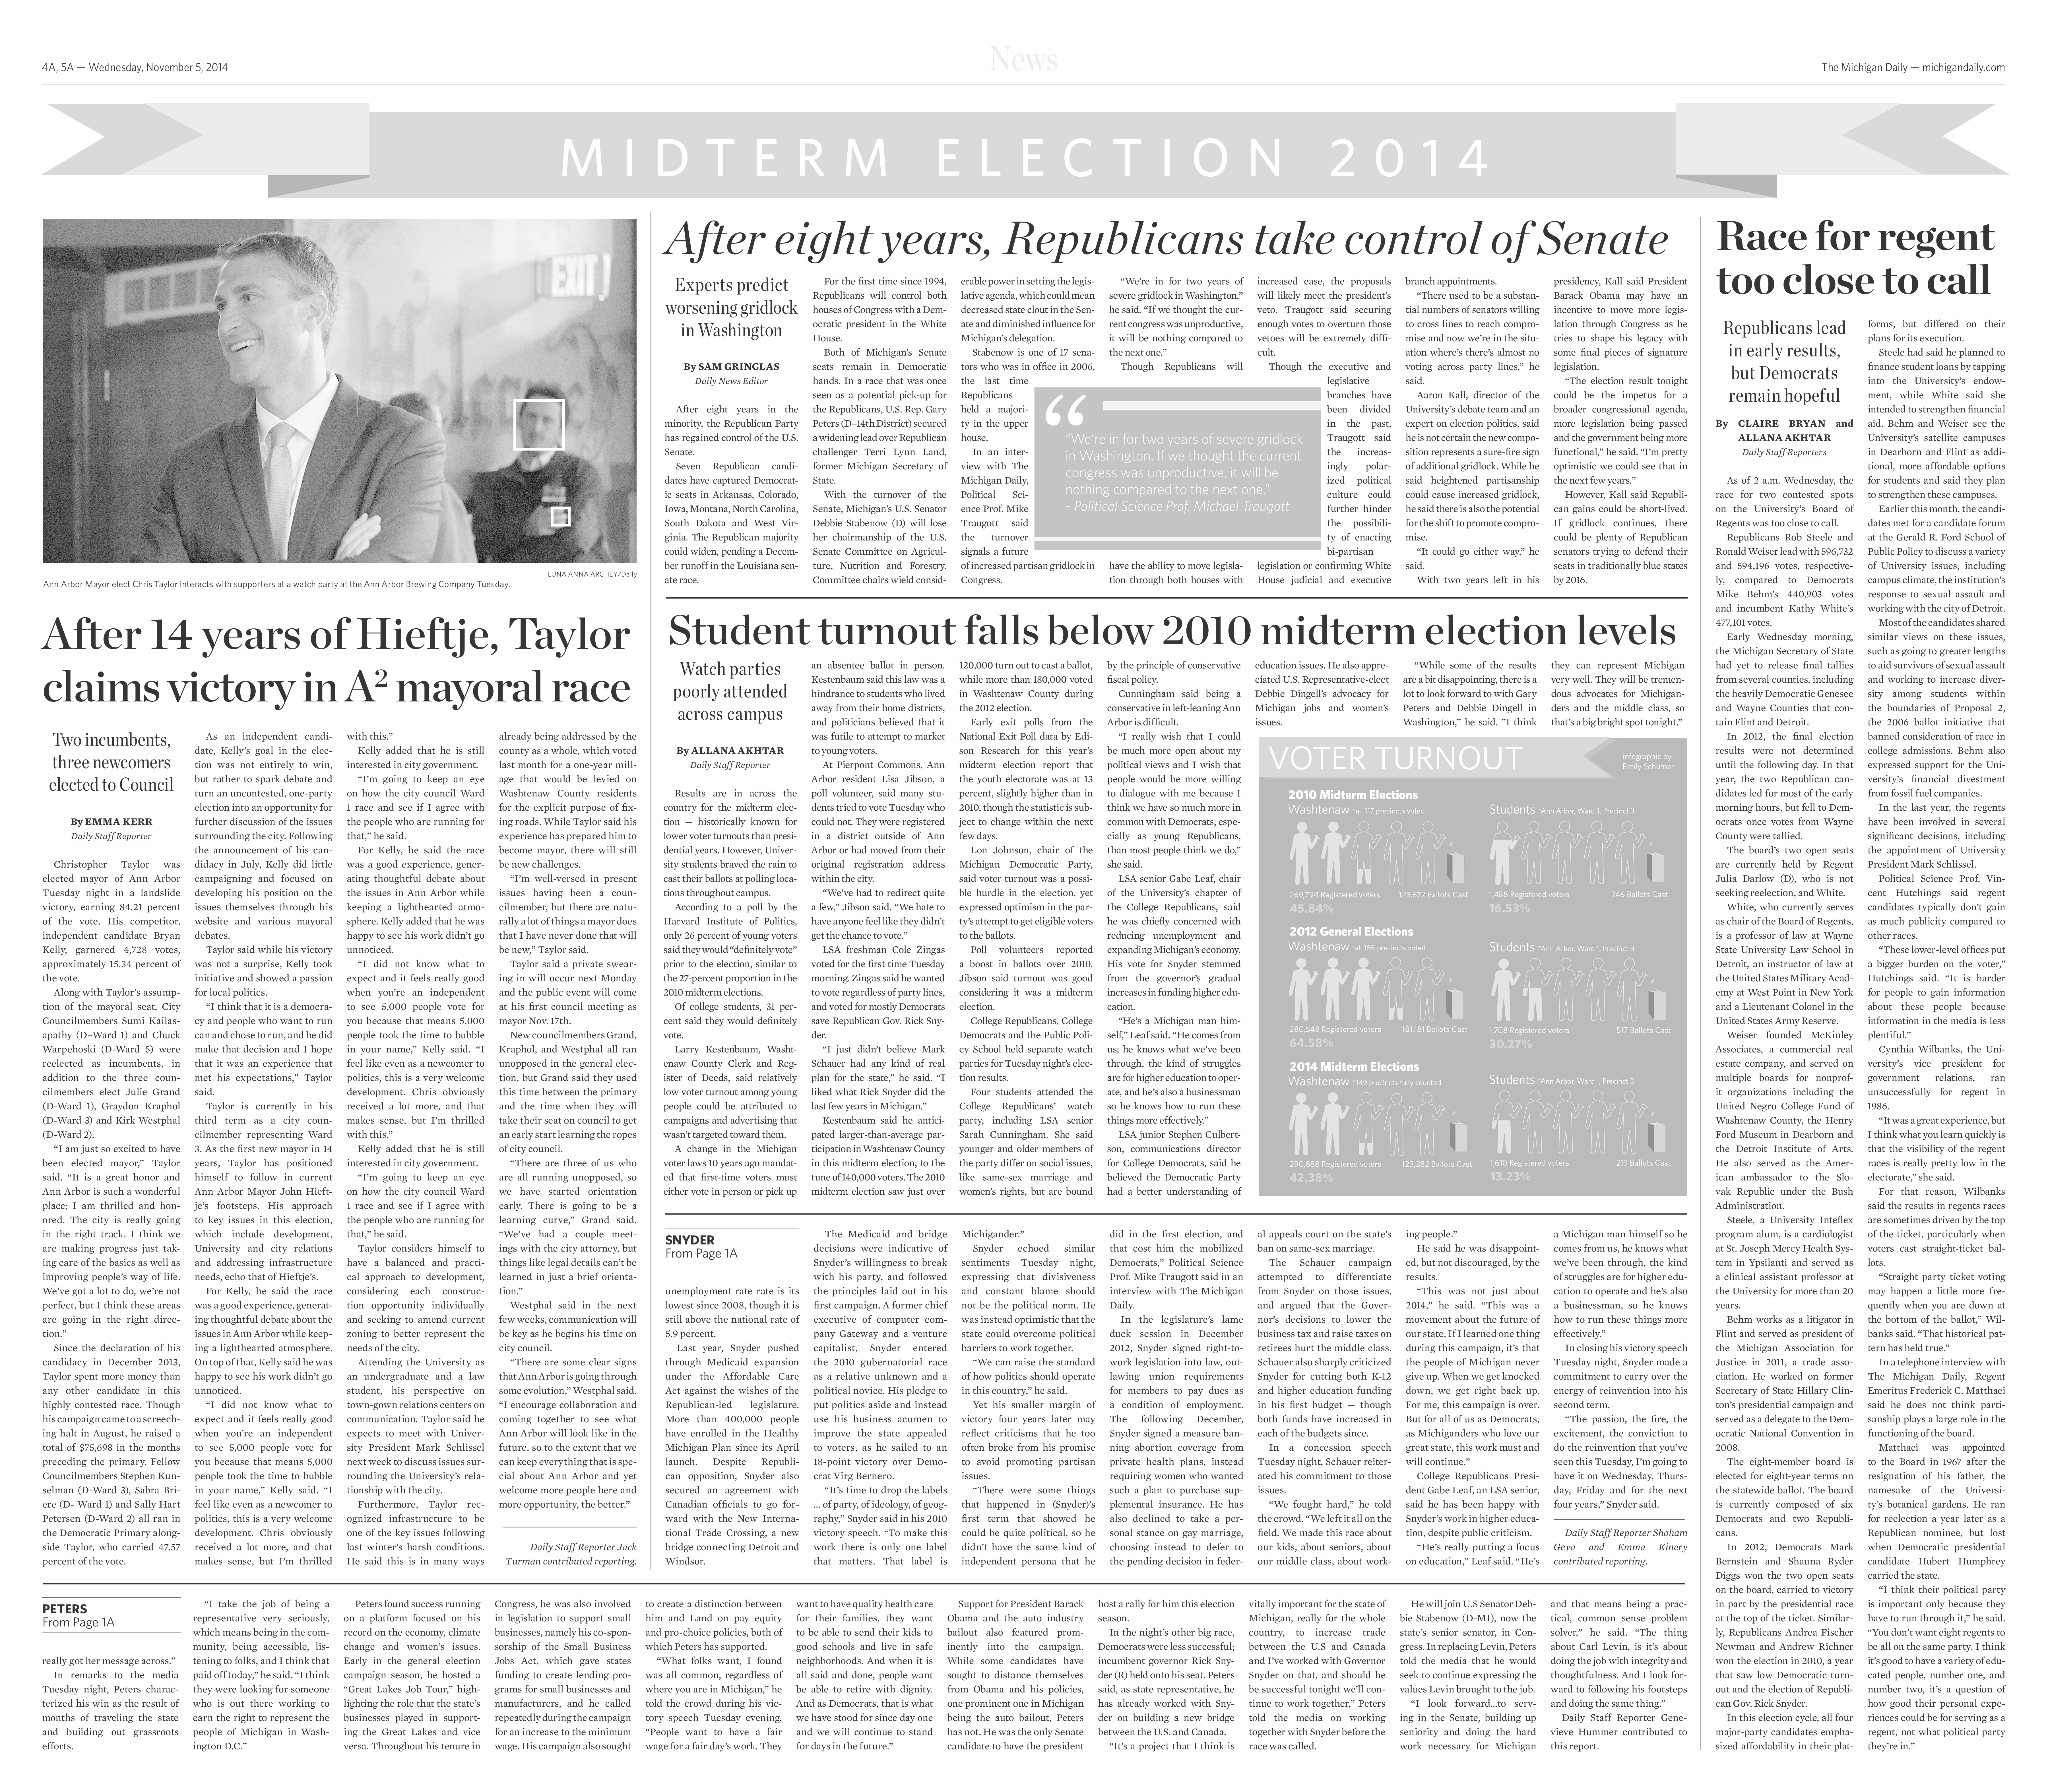

In [174]:
current_image = relevant_images[0][1]
gray_image = cv.cvtColor(current_image, cv.COLOR_BGR2GRAY)
rects = find_bind_face(gray_image, 1.3)

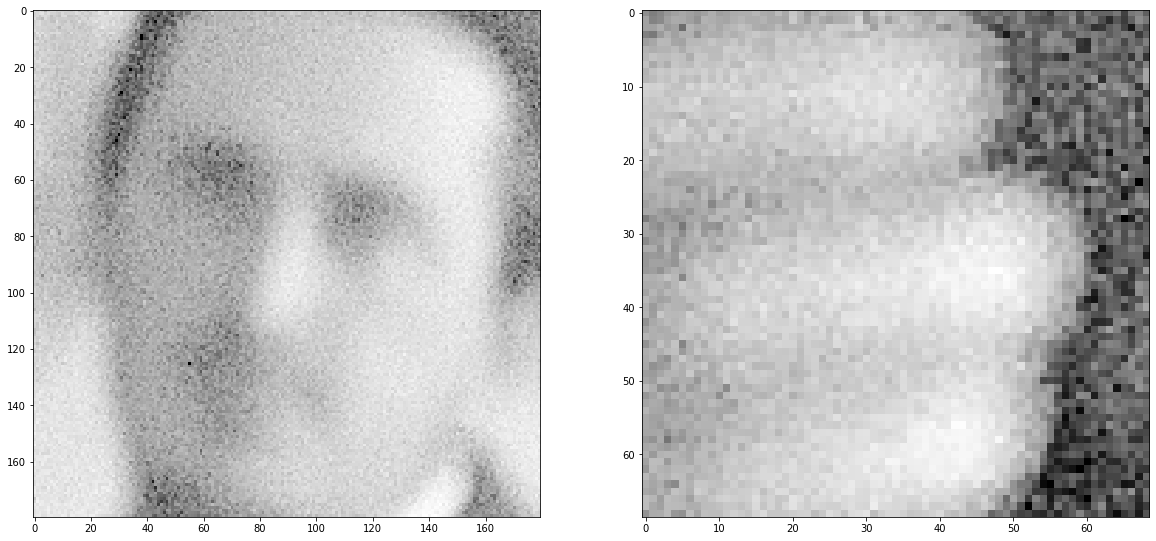

In [175]:
# cropped_faces = [ Image.fromarray(current_image).crop(r) for r in rects ] 
imgs = crop_zoom_face(current_image, rects)
figure_faces(imgs)